Chapter 04

# 二项式系数
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码通过计算二项式$(x + 1)^n$的展开式，提取各项系数并绘制其分布图，以展示不同幂次下二项式系数的变化情况。具体来说，对于不同的$n$值（如$4, 8, 12, 5, 9, 13, 36$），代码依次展开$(x + 1)^n$，将其表示为多项式形式：

$$
(x + 1)^n = \sum_{k=0}^{n} \binom{n}{k} x^k
$$

其中，$\binom{n}{k}$表示第$k$项的系数。代码提取每个展开式的系数列表$\{\binom{n}{0}, \binom{n}{1}, \dots, \binom{n}{n}\}$，并在图形中绘制这些系数随阶次（从$0$到$n$）的分布。

### 主要步骤

1. **多项式展开**：计算$(x + 1)^n$的展开式，并提取各项系数，得到一个包含二项式系数的列表。
   
2. **绘制系数分布图**：使用`stem`图展示各项的系数值，横轴为多项式的阶次，纵轴为对应的系数值。设置横轴从$n$至$0$的递减顺序，使最高次项显示在左侧。

### 数学意义

二项式定理表明，$(x + 1)^n$的展开式中的系数遵循二项式分布，随着$n$的增加，这些系数逐渐形成对称的分布，接近正态分布。这一现象在概率论中称为二项分布的正态逼近：

$$
\binom{n}{k} \approx \frac{1}{\sqrt{2 \pi n p (1-p)}} e^{-\frac{(k - np)^2}{2np(1-p)}}
$$

其中$p = 0.5$。该代码通过可视化不同$n$下的系数分布，展示了二项式展开的对称性和逼近性。随着$n$增大，系数分布趋向于正态分布，这是二项分布向正态分布收敛的直观体现。

[1, 4, 6, 4, 1]


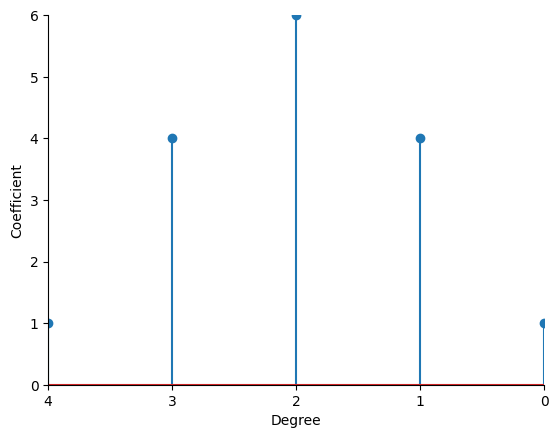

[1, 8, 28, 56, 70, 56, 28, 8, 1]


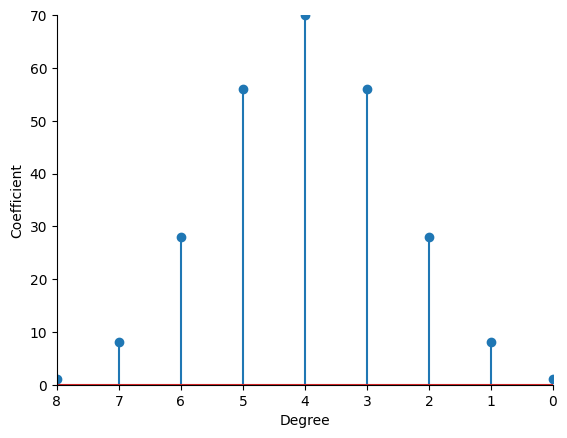

[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]


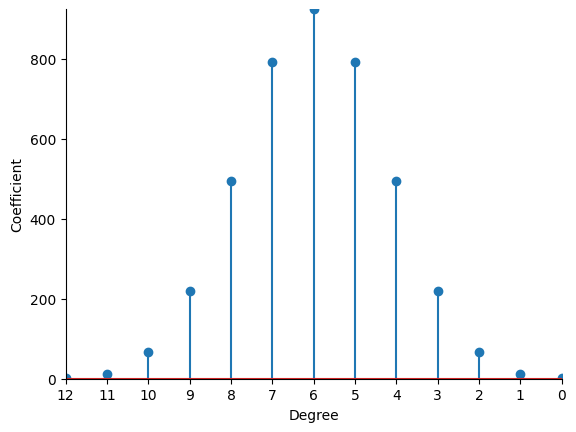

[1, 5, 10, 10, 5, 1]


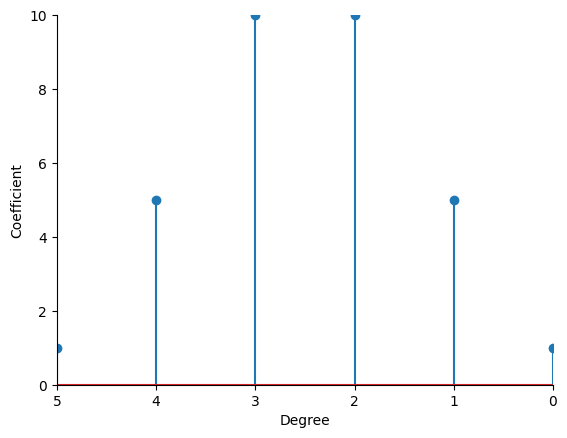

[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


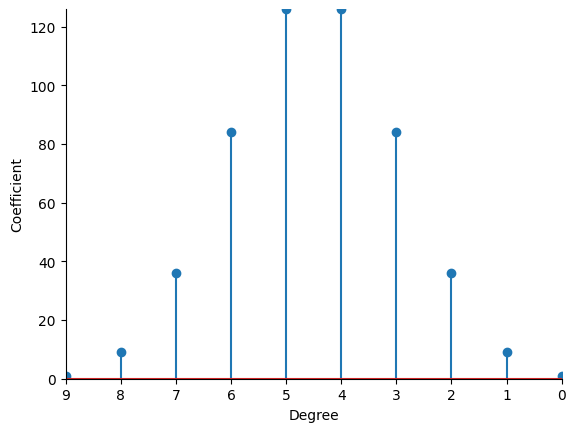

[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]


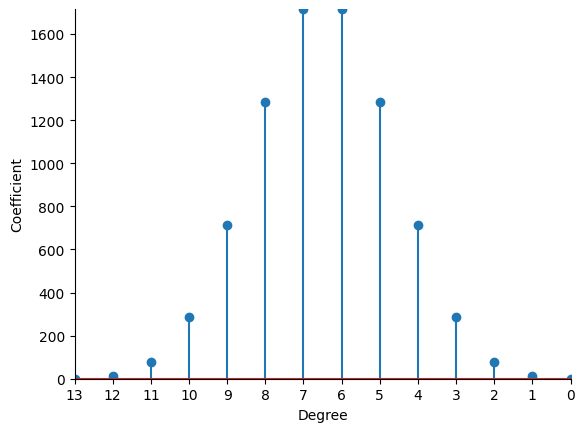

[1, 36, 630, 7140, 58905, 376992, 1947792, 8347680, 30260340, 94143280, 254186856, 600805296, 1251677700, 2310789600, 3796297200, 5567902560, 7307872110, 8597496600, 9075135300, 8597496600, 7307872110, 5567902560, 3796297200, 2310789600, 1251677700, 600805296, 254186856, 94143280, 30260340, 8347680, 1947792, 376992, 58905, 7140, 630, 36, 1]


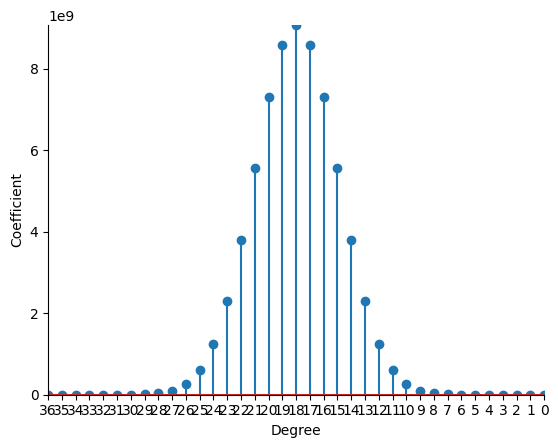

In [1]:
## 展开多项式并绘制其系数图
from sympy.abc import x, a
from sympy import Poly
import matplotlib.pyplot as plt
import numpy as np

for n in [4, 8, 12, 5, 9, 13, 36]:  # 迭代不同次幂的多项式
    
    expr = (x + 1)**n  # 定义多项式表达式
    expr_expand = expr.expand()  # 展开多项式
    expr_expand = Poly(expr_expand)  # 转换为多项式形式
    
    poly_coeffs = expr_expand.coeffs()  # 获取多项式的系数列表
    
    print(poly_coeffs)  # 输出系数列表
    
    degrees = np.linspace(n, 0, n + 1)  # 定义多项式的阶次
    
    fig, ax = plt.subplots()
    
    plt.stem(degrees, np.array(poly_coeffs, dtype=float))  # 绘制系数的分布图
    plt.xlim(0, n)  # 设置x轴范围
    plt.xticks(np.arange(0, n+1))  # 设置x轴刻度
    y_max = max(poly_coeffs)  # 获取系数的最大值
    y_max = float(y_max)
    plt.ylim(0, y_max)  # 设置y轴范围
    
    ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    ax.invert_xaxis()  # 翻转x轴
    plt.xlabel('Degree')  # 设置x轴标签
    plt.ylabel('Coefficient')  # 设置y轴标签
    plt.show()
